In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import awkward as ak
from dask.distributed import Client
# local
sys.path.insert(1, os.path.join(sys.path[0], '../../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline
from tqdm.notebook import tqdm

In [2]:
samples_4mu = [
    
    "4Mu_500GeV_5p0GeV_0p08mm",
    "4Mu_500GeV_5p0GeV_0p8mm",
    "4Mu_500GeV_5p0GeV_8p0mm",
    "4Mu_500GeV_5p0GeV_40p0mm",
    "4Mu_500GeV_5p0GeV_80p0mm",   
]

samples_bkg = [
    "TTJets",
]

In [3]:
# fileset_4mu = utilities.make_fileset(samples_4mu, "llpNanoAOD_v2", max_files=1, location_cfg="signal_v6.yaml")
# fileset_bkg = utilities.make_fileset(samples_bkg, "llpNanoAOD_v2", max_files=1, location_cfg="backgrounds.yaml")

fileset_4mu = utilities.make_fileset(samples_4mu, "llpNanoAOD_v2", location_cfg="signal_v6.yaml")
fileset_bkg = utilities.make_fileset(samples_bkg, "llpNanoAOD_v2", location_cfg="backgrounds.yaml")

fileset_4mu['TTJets'] = fileset_bkg['TTJets']

runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    #executor=processor.FuturesExecutor(),
    schema=NanoAODSchema,
#    maxchunks=10,
    skipbadfiles=True
)

channels = [
    "base",
]

p = sidm_processor.SidmProcessor(
    channels,
    ["base"],
)

output_4mu = runner.run(fileset_4mu, treename="Events", processor_instance=p)

out_4mu = output_4mu["out"]

Output()

Output()

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: divide by zero encountered 
in divide
  result = getattr(ufunc, method)(

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in
divide
  result = getattr(ufunc, method)(

#--------------------------------------------------------------------------
#                         FastJet release 3.4.0
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


In [19]:
samples_4mu = [
    "TTJets",
    
    "4Mu_500GeV_5p0GeV_0p08mm",
    "4Mu_500GeV_5p0GeV_0p8mm",
    "4Mu_500GeV_5p0GeV_8p0mm",
    "4Mu_500GeV_5p0GeV_40p0mm",
    "4Mu_500GeV_5p0GeV_80p0mm",   
]

In [20]:
BKG_4mu = out_4mu[samples_4mu[0]]["hists"]
SIG_1_4mu = out_4mu[samples_4mu[1]]["hists"]
SIG_2_4mu = out_4mu[samples_4mu[2]]["hists"]
SIG_3_4mu = out_4mu[samples_4mu[3]]["hists"]
SIG_4_4mu = out_4mu[samples_4mu[4]]["hists"]
SIG_5_4mu = out_4mu[samples_4mu[5]]["hists"]

Text(0.5, 1.0, '4Mu TTJets')

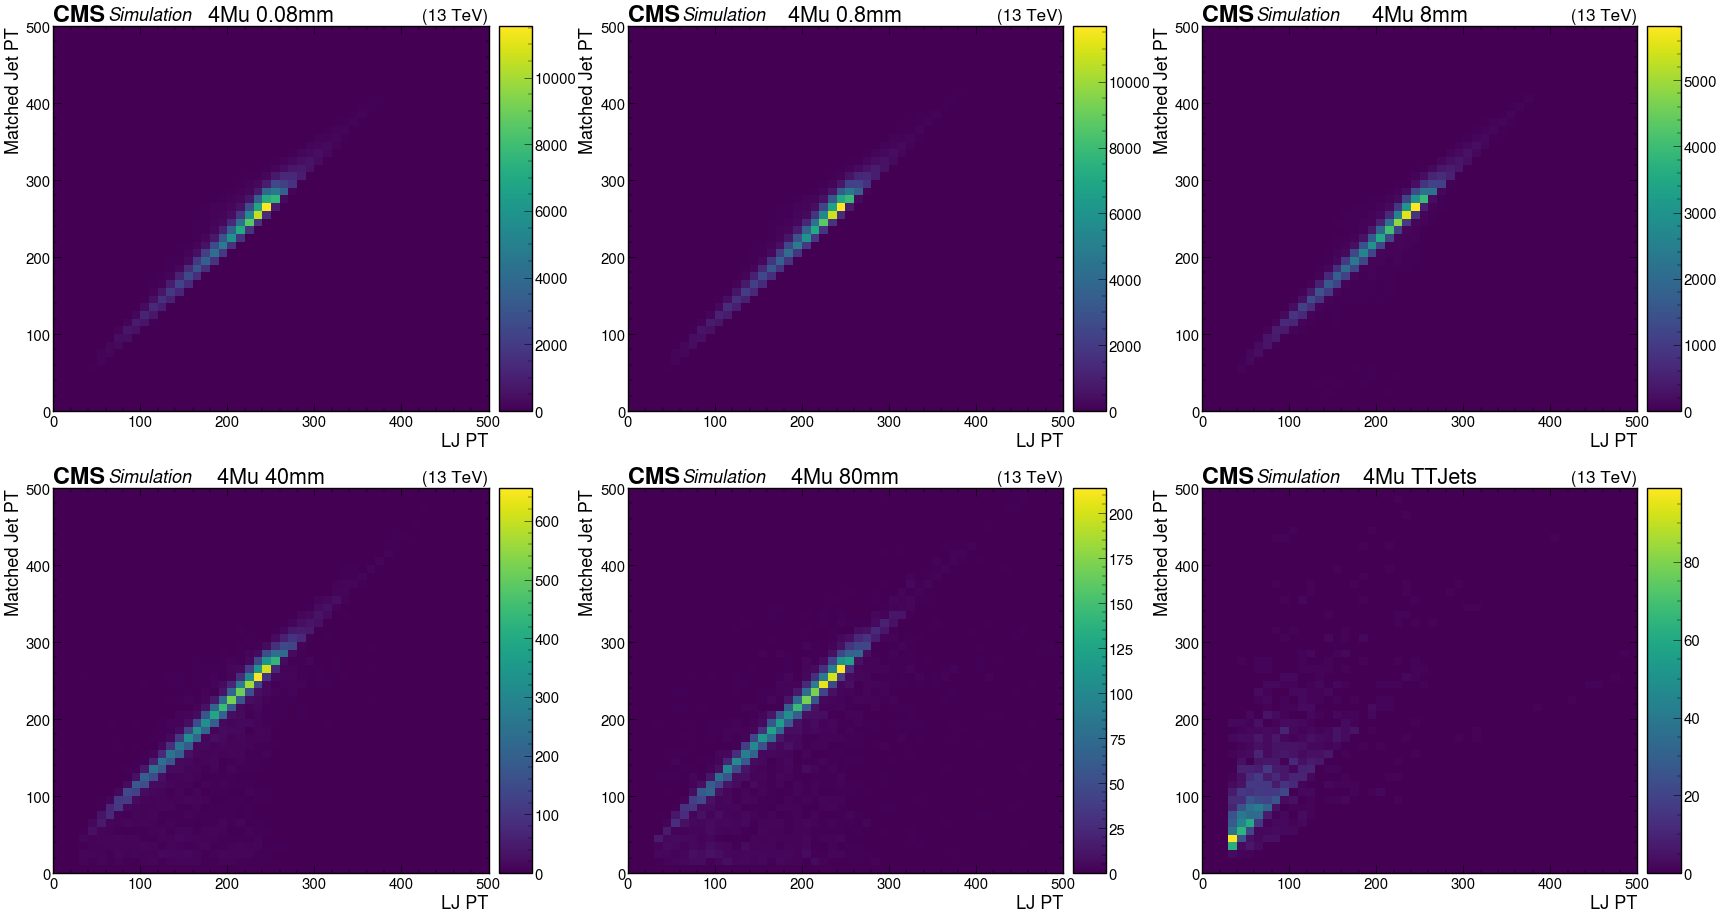

In [31]:
nplots = 3
plt.subplots(2, nplots, figsize=(nplots*14, 22))

plt.subplot(2, nplots, 1)
utilities.plot(SIG_1_4mu["lj_matchedjet_pt"][channels[0], :, :], flow='none')
plt.title("4Mu 0.08mm")

plt.subplot(2, nplots, 2)
utilities.plot(SIG_2_4mu["lj_matchedjet_pt"][channels[0], :, :], flow='none')
plt.title("4Mu 0.8mm")

plt.subplot(2, nplots, 3)
utilities.plot(SIG_3_4mu["lj_matchedjet_pt"][channels[0], :, :], flow='none')
plt.title("4Mu 8mm")

plt.subplot(2, nplots, 4)
utilities.plot(SIG_4_4mu["lj_matchedjet_pt"][channels[0], :, :], flow='none')
plt.title("4Mu 40mm")

plt.subplot(2, nplots, 5)
utilities.plot(SIG_5_4mu["lj_matchedjet_pt"][channels[0], :, :], flow='none')
plt.title("4Mu 80mm")

plt.subplot(2, nplots, 6)
utilities.plot(BKG_4mu["lj_matchedjet_pt"][channels[0], :, :], flow='none')
plt.title("4Mu TTJets")

Text(0.5, 1.0, '4Mu TTJets')

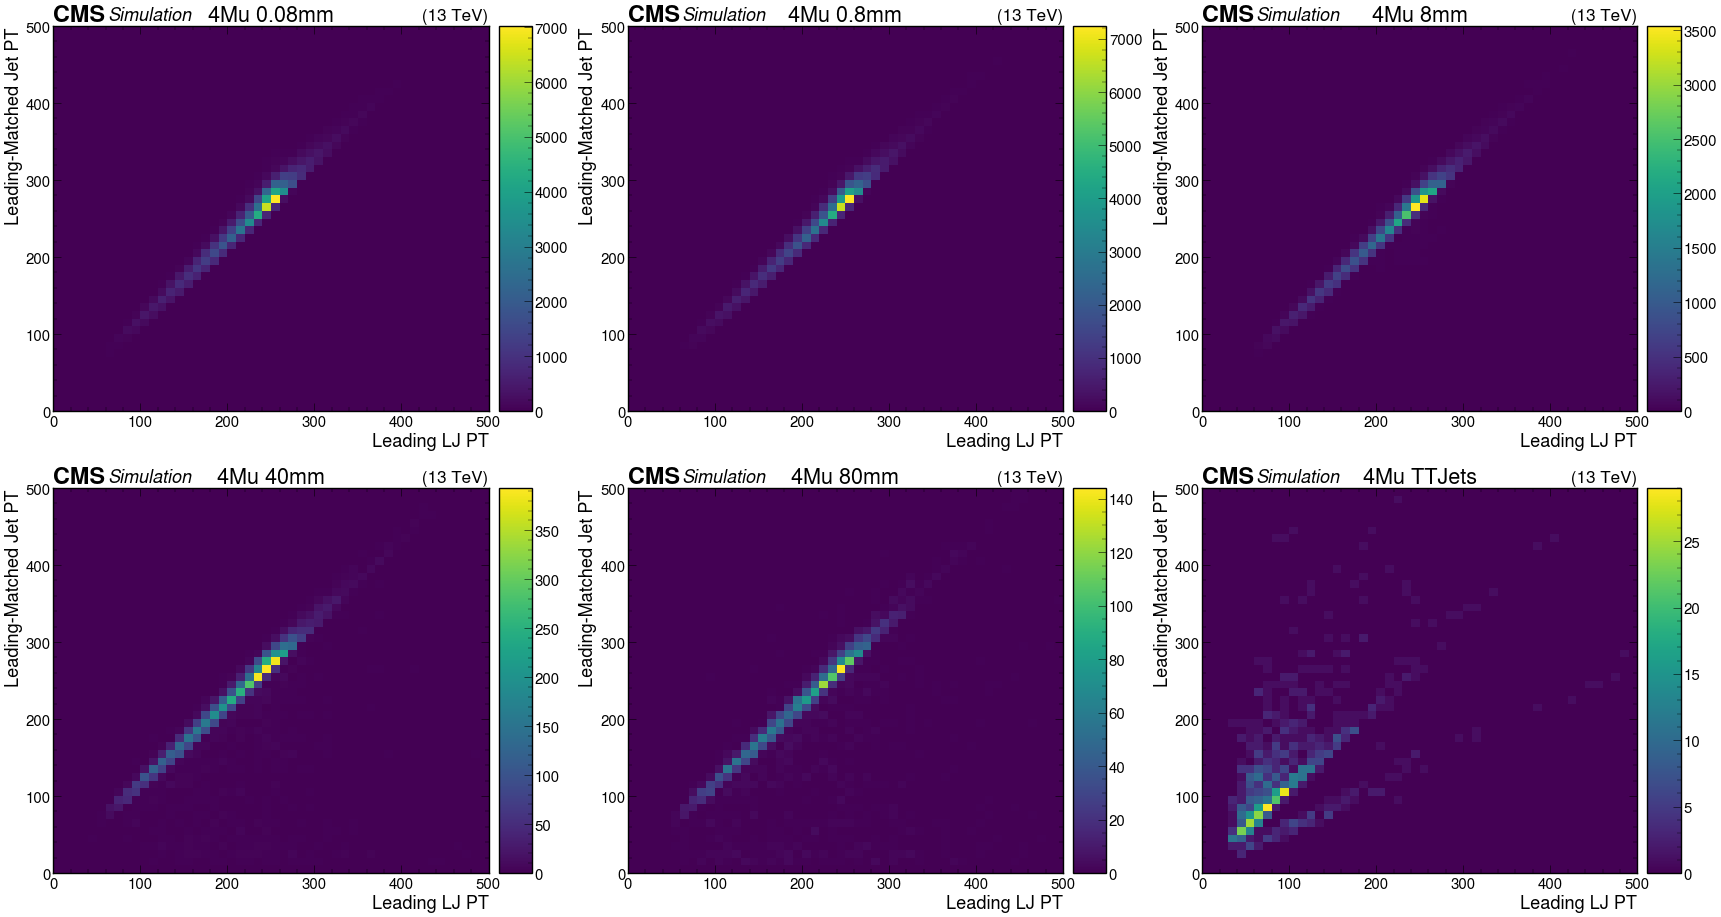

In [32]:
nplots = 3
plt.subplots(2, nplots, figsize=(nplots*14, 22))

plt.subplot(2, nplots, 1)
utilities.plot(SIG_1_4mu["leading_lj_matchedjet_pt"][channels[0], :, :], flow='none')
plt.title("4Mu 0.08mm")

plt.subplot(2, nplots, 2)
utilities.plot(SIG_2_4mu["leading_lj_matchedjet_pt"][channels[0], :, :], flow='none')
plt.title("4Mu 0.8mm")

plt.subplot(2, nplots, 3)
utilities.plot(SIG_3_4mu["leading_lj_matchedjet_pt"][channels[0], :, :], flow='none')
plt.title("4Mu 8mm")

plt.subplot(2, nplots, 4)
utilities.plot(SIG_4_4mu["leading_lj_matchedjet_pt"][channels[0], :, :], flow='none')
plt.title("4Mu 40mm")

plt.subplot(2, nplots, 5)
utilities.plot(SIG_5_4mu["leading_lj_matchedjet_pt"][channels[0], :, :], flow='none')
plt.title("4Mu 80mm")

plt.subplot(2, nplots, 6)
utilities.plot(BKG_4mu["leading_lj_matchedjet_pt"][channels[0], :, :], flow='none')
plt.title("4Mu TTJets")

Text(0.5, 1.0, '4Mu TTJets')

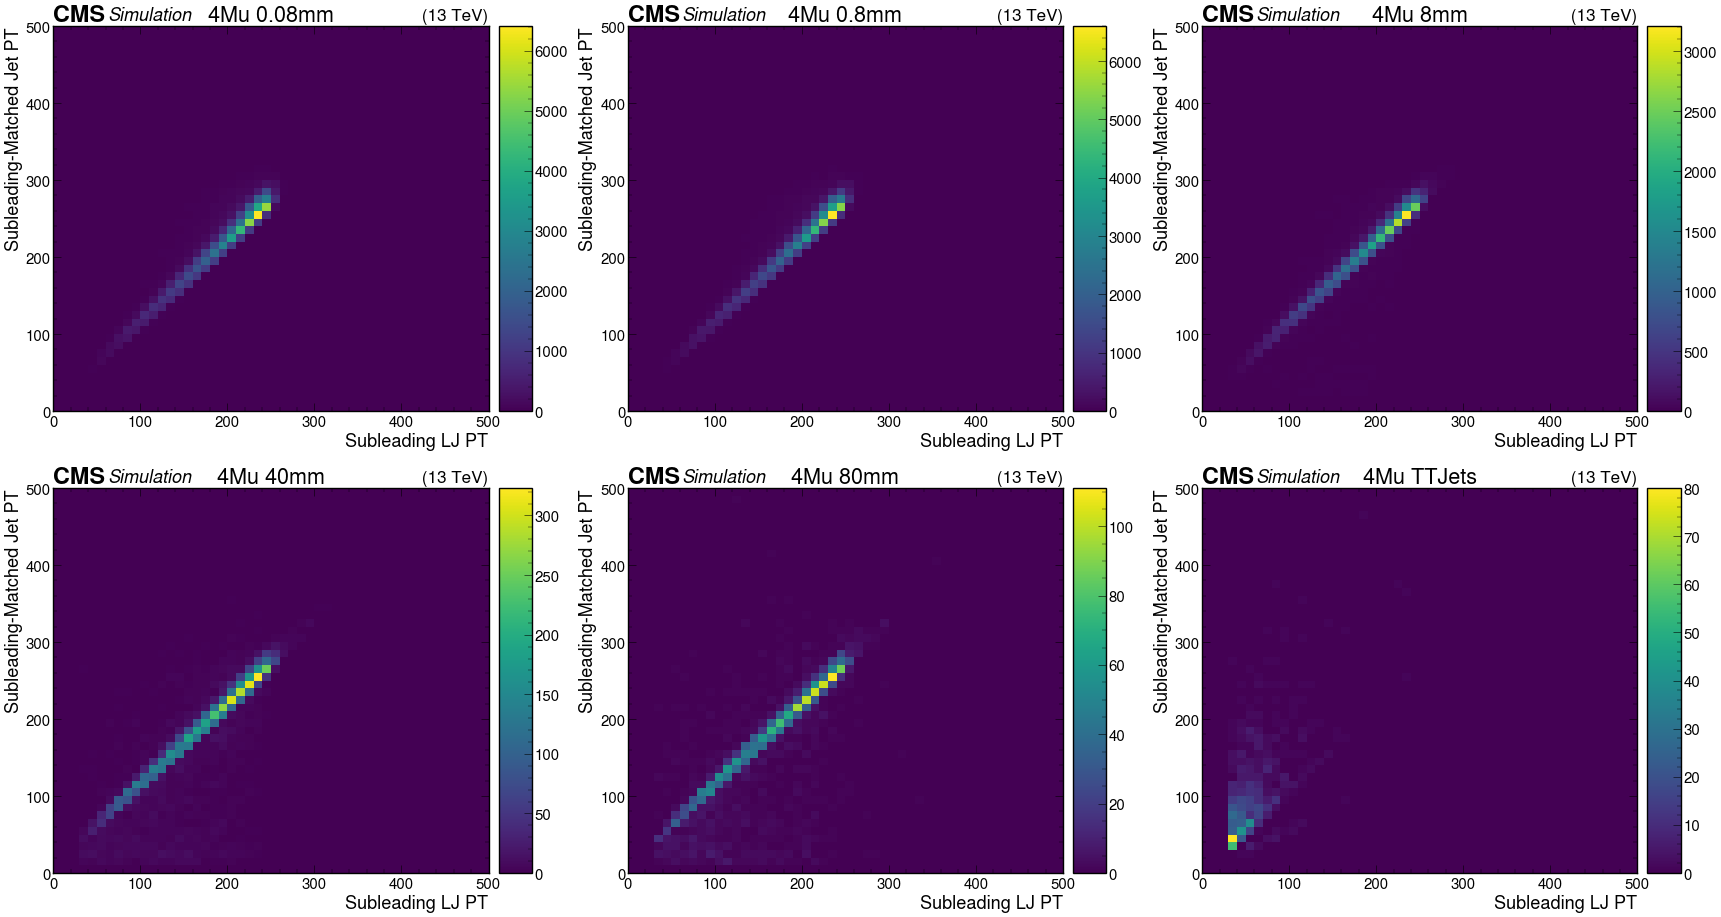

In [33]:
nplots = 3
plt.subplots(2, nplots, figsize=(nplots*14, 22))

plt.subplot(2, nplots, 1)
utilities.plot(SIG_1_4mu["subleading_lj_matchedjet_pt"][channels[0], :, :], flow='none')
plt.title("4Mu 0.08mm")

plt.subplot(2, nplots, 2)
utilities.plot(SIG_2_4mu["subleading_lj_matchedjet_pt"][channels[0], :, :], flow='none')
plt.title("4Mu 0.8mm")

plt.subplot(2, nplots, 3)
utilities.plot(SIG_3_4mu["subleading_lj_matchedjet_pt"][channels[0], :, :], flow='none')
plt.title("4Mu 8mm")

plt.subplot(2, nplots, 4)
utilities.plot(SIG_4_4mu["subleading_lj_matchedjet_pt"][channels[0], :, :], flow='none')
plt.title("4Mu 40mm")

plt.subplot(2, nplots, 5)
utilities.plot(SIG_5_4mu["subleading_lj_matchedjet_pt"][channels[0], :, :], flow='none')
plt.title("4Mu 80mm")

plt.subplot(2, nplots, 6)
utilities.plot(BKG_4mu["subleading_lj_matchedjet_pt"][channels[0], :, :], flow='none')
plt.title("4Mu TTJets")

Text(0.5, 1.0, '4Mu TTJets')

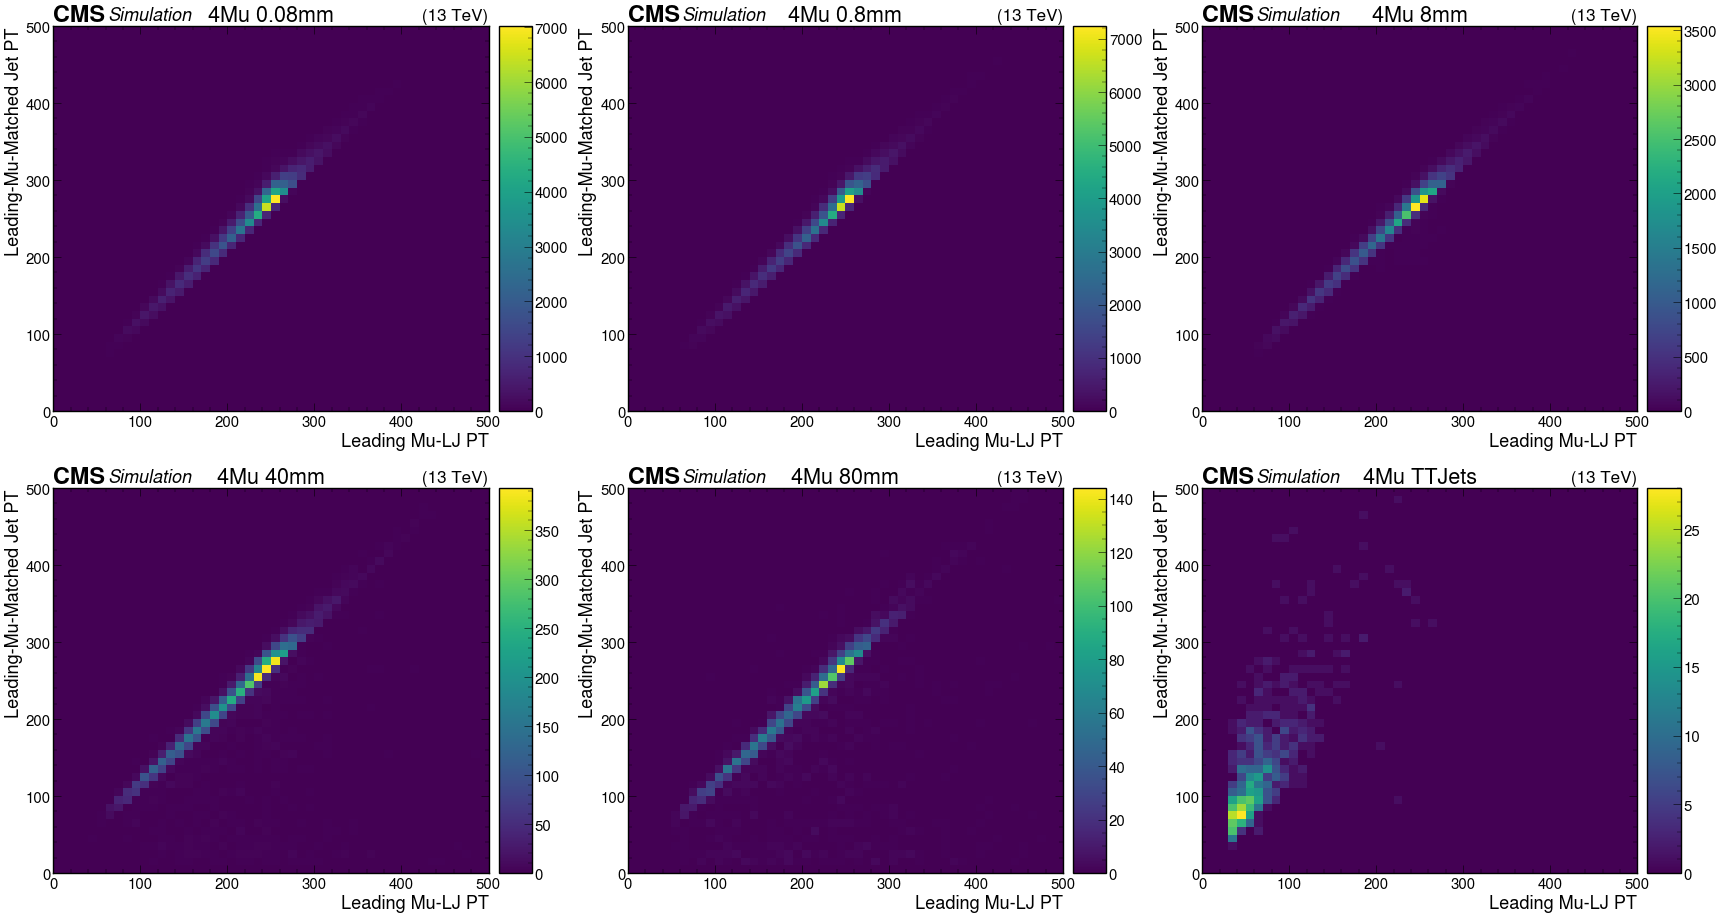

In [34]:
nplots = 3
plt.subplots(2, nplots, figsize=(nplots*14, 22))

plt.subplot(2, nplots, 1)
utilities.plot(SIG_1_4mu["leading_mu_lj_matchedjet_pt"][channels[0], :, :], flow='none')
plt.title("4Mu 0.08mm")

plt.subplot(2, nplots, 2)
utilities.plot(SIG_2_4mu["leading_mu_lj_matchedjet_pt"][channels[0], :, :], flow='none')
plt.title("4Mu 0.8mm")

plt.subplot(2, nplots, 3)
utilities.plot(SIG_3_4mu["leading_mu_lj_matchedjet_pt"][channels[0], :, :], flow='none')
plt.title("4Mu 8mm")

plt.subplot(2, nplots, 4)
utilities.plot(SIG_4_4mu["leading_mu_lj_matchedjet_pt"][channels[0], :, :], flow='none')
plt.title("4Mu 40mm")

plt.subplot(2, nplots, 5)
utilities.plot(SIG_5_4mu["leading_mu_lj_matchedjet_pt"][channels[0], :, :], flow='none')
plt.title("4Mu 80mm")

plt.subplot(2, nplots, 6)
utilities.plot(BKG_4mu["leading_mu_lj_matchedjet_pt"][channels[0], :, :], flow='none')
plt.title("4Mu TTJets")

Text(0.5, 1.0, '4Mu TTJets')

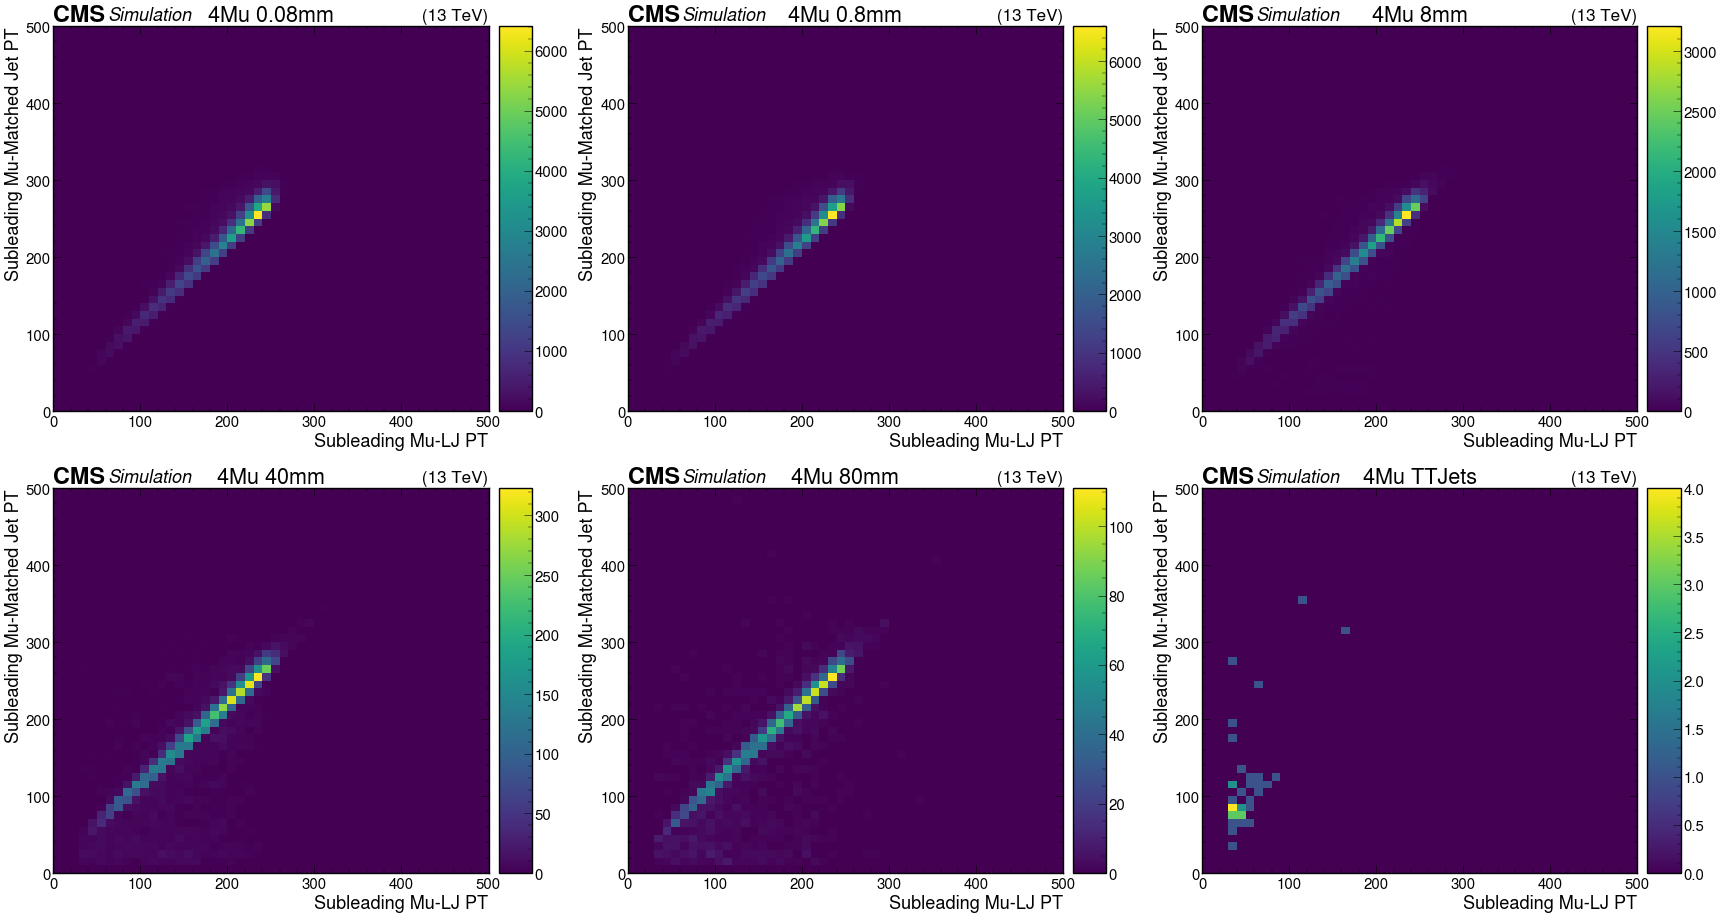

In [36]:
nplots = 3
plt.subplots(2, nplots, figsize=(nplots*14, 22))

plt.subplot(2, nplots, 1)
utilities.plot(SIG_1_4mu["subleading_mu_lj_matchedjet_pt"][channels[0], :, :], flow='none')
plt.title("4Mu 0.08mm")

plt.subplot(2, nplots, 2)
utilities.plot(SIG_2_4mu["subleading_mu_lj_matchedjet_pt"][channels[0], :, :], flow='none')
plt.title("4Mu 0.8mm")

plt.subplot(2, nplots, 3)
utilities.plot(SIG_3_4mu["subleading_mu_lj_matchedjet_pt"][channels[0], :, :], flow='none')
plt.title("4Mu 8mm")

plt.subplot(2, nplots, 4)
utilities.plot(SIG_4_4mu["subleading_mu_lj_matchedjet_pt"][channels[0], :, :], flow='none')
plt.title("4Mu 40mm")

plt.subplot(2, nplots, 5)
utilities.plot(SIG_5_4mu["subleading_mu_lj_matchedjet_pt"][channels[0], :, :], flow='none')
plt.title("4Mu 80mm")

plt.subplot(2, nplots, 6)
utilities.plot(BKG_4mu["subleading_mu_lj_matchedjet_pt"][channels[0], :, :], flow='none')
plt.title("4Mu TTJets")

In [37]:
eff_hist_bkg_4mu, errors_bkg_4mu = utilities.get_eff_hist(BKG_4mu["leading_lj_matchedjet_pt"]['base',:,:], BKG_4mu["lj_matchedjet_pt"]['base',:,:])
eff_hist_sig1_4mu, errors_sig1_4mu = utilities.get_eff_hist(SIG_1_4mu["leading_lj_matchedjet_pt"]['base',:,:], SIG_1_4mu["lj_matchedjet_pt"]['base',:,:])
eff_hist_sig2_4mu, errors_sig2_4mu = utilities.get_eff_hist(SIG_2_4mu["leading_lj_matchedjet_pt"]['base',:,:], SIG_2_4mu["lj_matchedjet_pt"]['base',:,:])
eff_hist_sig3_4mu, errors_sig3_4mu = utilities.get_eff_hist(SIG_3_4mu["leading_lj_matchedjet_pt"]['base',:,:], SIG_3_4mu["lj_matchedjet_pt"]['base',:,:])
eff_hist_sig4_4mu, errors_sig4_4mu = utilities.get_eff_hist(SIG_4_4mu["leading_lj_matchedjet_pt"]['base',:,:], SIG_4_4mu["lj_matchedjet_pt"]['base',:,:])
eff_hist_sig5_4mu, errors_sig5_4mu = utilities.get_eff_hist(SIG_5_4mu["leading_lj_matchedjet_pt"]['base',:,:], SIG_5_4mu["lj_matchedjet_pt"]['base',:,:])

Text(0.5, 1.0, '4mu TTJets')

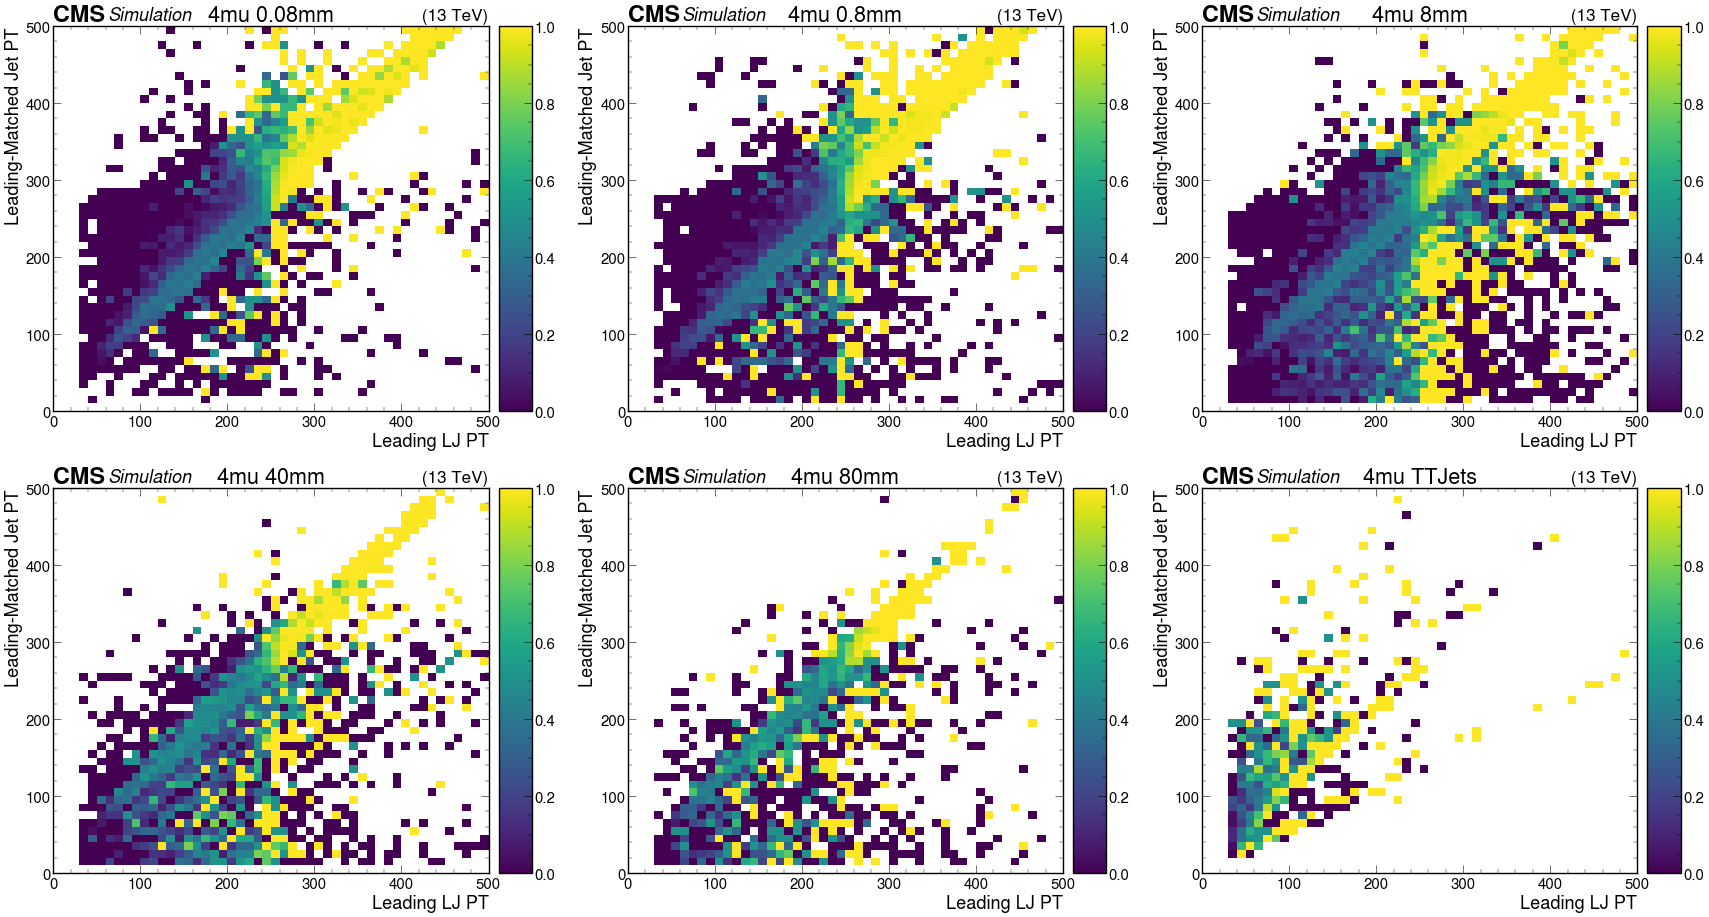

In [38]:
nplots = 3
plt.subplots(2, nplots, figsize=(nplots*14, 22))

plt.subplot(2, nplots, 1)
utilities.plot(eff_hist_sig1_4mu)
plt.title("4mu 0.08mm")

plt.subplot(2, nplots, 2)
utilities.plot(eff_hist_sig2_4mu)
plt.title("4mu 0.8mm")

plt.subplot(2, nplots, 3)
utilities.plot(eff_hist_sig3_4mu)
plt.title("4mu 8mm")

plt.subplot(2, nplots, 4)
utilities.plot(eff_hist_sig4_4mu)
plt.title("4mu 40mm")

plt.subplot(2, nplots, 5)
utilities.plot(eff_hist_sig5_4mu)
plt.title("4mu 80mm")

plt.subplot(2, nplots, 6)
utilities.plot(eff_hist_bkg_4mu)
plt.title("4mu TTJets")

In [39]:
eff_hist_bkg_4mu, errors_bkg_4mu = utilities.get_eff_hist(BKG_4mu["subleading_lj_matchedjet_pt"]['base',:,:], BKG_4mu["lj_matchedjet_pt"]['base',:,:])
eff_hist_sig1_4mu, errors_sig1_4mu = utilities.get_eff_hist(SIG_1_4mu["subleading_lj_matchedjet_pt"]['base',:,:], SIG_1_4mu["lj_matchedjet_pt"]['base',:,:])
eff_hist_sig2_4mu, errors_sig2_4mu = utilities.get_eff_hist(SIG_2_4mu["subleading_lj_matchedjet_pt"]['base',:,:], SIG_2_4mu["lj_matchedjet_pt"]['base',:,:])
eff_hist_sig3_4mu, errors_sig3_4mu = utilities.get_eff_hist(SIG_3_4mu["subleading_lj_matchedjet_pt"]['base',:,:], SIG_3_4mu["lj_matchedjet_pt"]['base',:,:])
eff_hist_sig4_4mu, errors_sig4_4mu = utilities.get_eff_hist(SIG_4_4mu["subleading_lj_matchedjet_pt"]['base',:,:], SIG_4_4mu["lj_matchedjet_pt"]['base',:,:])
eff_hist_sig5_4mu, errors_sig5_4mu = utilities.get_eff_hist(SIG_5_4mu["subleading_lj_matchedjet_pt"]['base',:,:], SIG_5_4mu["lj_matchedjet_pt"]['base',:,:])

Text(0.5, 1.0, '4mu TTJets')

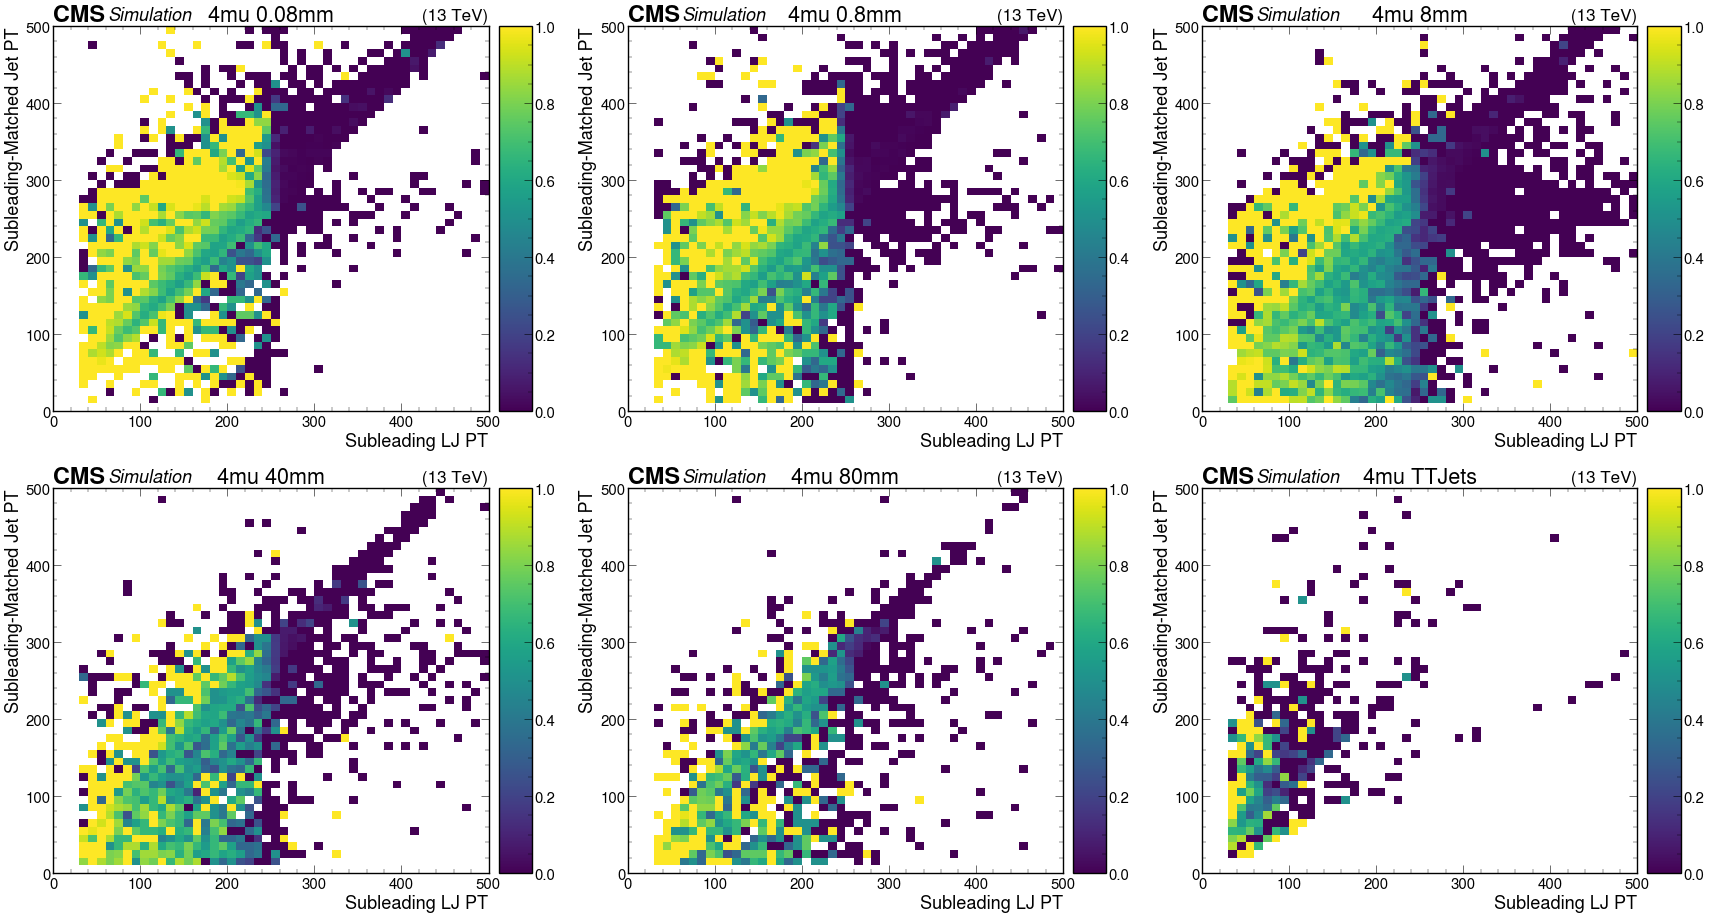

In [40]:
nplots = 3
plt.subplots(2, nplots, figsize=(nplots*14, 22))

plt.subplot(2, nplots, 1)
utilities.plot(eff_hist_sig1_4mu)
plt.title("4mu 0.08mm")

plt.subplot(2, nplots, 2)
utilities.plot(eff_hist_sig2_4mu)
plt.title("4mu 0.8mm")

plt.subplot(2, nplots, 3)
utilities.plot(eff_hist_sig3_4mu)
plt.title("4mu 8mm")

plt.subplot(2, nplots, 4)
utilities.plot(eff_hist_sig4_4mu)
plt.title("4mu 40mm")

plt.subplot(2, nplots, 5)
utilities.plot(eff_hist_sig5_4mu)
plt.title("4mu 80mm")

plt.subplot(2, nplots, 6)
utilities.plot(eff_hist_bkg_4mu)
plt.title("4mu TTJets")

In [41]:
eff_hist_bkg_4mu, errors_bkg_4mu = utilities.get_eff_hist(BKG_4mu["leading_mu_lj_matchedjet_pt"]['base',:,:], BKG_4mu["lj_matchedjet_pt"]['base',:,:])
eff_hist_sig1_4mu, errors_sig1_4mu = utilities.get_eff_hist(SIG_1_4mu["leading_mu_lj_matchedjet_pt"]['base',:,:], SIG_1_4mu["lj_matchedjet_pt"]['base',:,:])
eff_hist_sig2_4mu, errors_sig2_4mu = utilities.get_eff_hist(SIG_2_4mu["leading_mu_lj_matchedjet_pt"]['base',:,:], SIG_2_4mu["lj_matchedjet_pt"]['base',:,:])
eff_hist_sig3_4mu, errors_sig3_4mu = utilities.get_eff_hist(SIG_3_4mu["leading_mu_lj_matchedjet_pt"]['base',:,:], SIG_3_4mu["lj_matchedjet_pt"]['base',:,:])
eff_hist_sig4_4mu, errors_sig4_4mu = utilities.get_eff_hist(SIG_4_4mu["leading_mu_lj_matchedjet_pt"]['base',:,:], SIG_4_4mu["lj_matchedjet_pt"]['base',:,:])
eff_hist_sig5_4mu, errors_sig5_4mu = utilities.get_eff_hist(SIG_5_4mu["leading_mu_lj_matchedjet_pt"]['base',:,:], SIG_5_4mu["lj_matchedjet_pt"]['base',:,:])

Text(0.5, 1.0, '4mu TTJets')

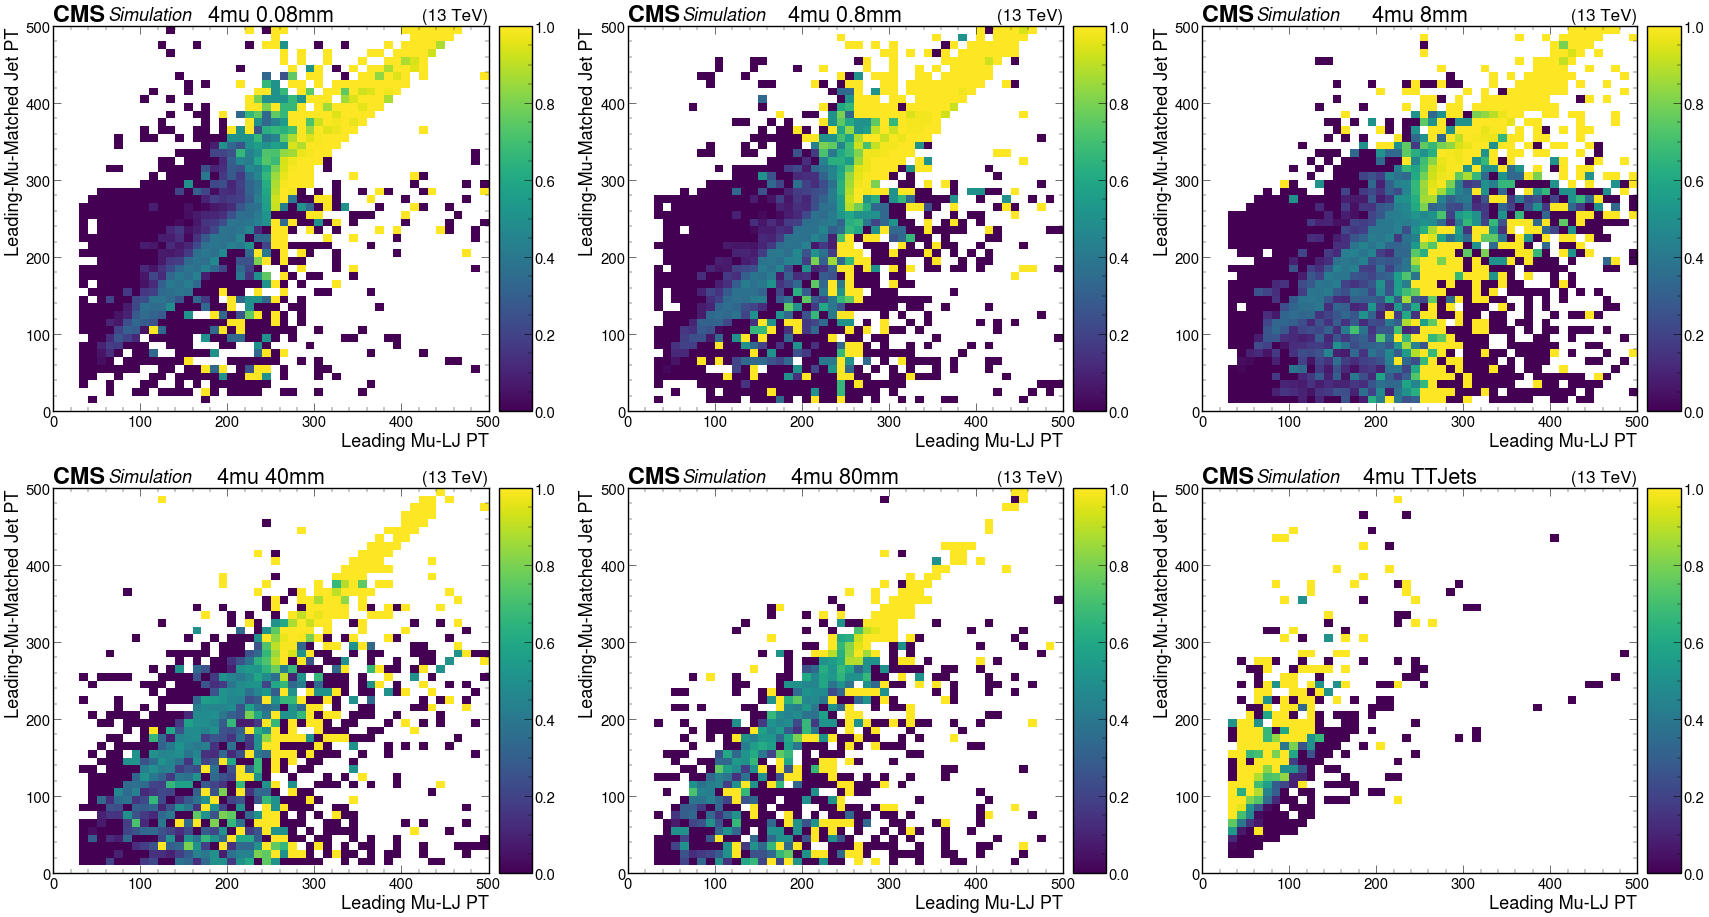

In [42]:
nplots = 3
plt.subplots(2, nplots, figsize=(nplots*14, 22))

plt.subplot(2, nplots, 1)
utilities.plot(eff_hist_sig1_4mu)
plt.title("4mu 0.08mm")

plt.subplot(2, nplots, 2)
utilities.plot(eff_hist_sig2_4mu)
plt.title("4mu 0.8mm")

plt.subplot(2, nplots, 3)
utilities.plot(eff_hist_sig3_4mu)
plt.title("4mu 8mm")

plt.subplot(2, nplots, 4)
utilities.plot(eff_hist_sig4_4mu)
plt.title("4mu 40mm")

plt.subplot(2, nplots, 5)
utilities.plot(eff_hist_sig5_4mu)
plt.title("4mu 80mm")

plt.subplot(2, nplots, 6)
utilities.plot(eff_hist_bkg_4mu)
plt.title("4mu TTJets")

In [43]:
eff_hist_bkg_4mu, errors_bkg_4mu = utilities.get_eff_hist(BKG_4mu["subleading_mu_lj_matchedjet_pt"]['base',:,:], BKG_4mu["lj_matchedjet_pt"]['base',:,:])
eff_hist_sig1_4mu, errors_sig1_4mu = utilities.get_eff_hist(SIG_1_4mu["subleading_mu_lj_matchedjet_pt"]['base',:,:], SIG_1_4mu["lj_matchedjet_pt"]['base',:,:])
eff_hist_sig2_4mu, errors_sig2_4mu = utilities.get_eff_hist(SIG_2_4mu["subleading_mu_lj_matchedjet_pt"]['base',:,:], SIG_2_4mu["lj_matchedjet_pt"]['base',:,:])
eff_hist_sig3_4mu, errors_sig3_4mu = utilities.get_eff_hist(SIG_3_4mu["subleading_mu_lj_matchedjet_pt"]['base',:,:], SIG_3_4mu["lj_matchedjet_pt"]['base',:,:])
eff_hist_sig4_4mu, errors_sig4_4mu = utilities.get_eff_hist(SIG_4_4mu["subleading_mu_lj_matchedjet_pt"]['base',:,:], SIG_4_4mu["lj_matchedjet_pt"]['base',:,:])
eff_hist_sig5_4mu, errors_sig5_4mu = utilities.get_eff_hist(SIG_5_4mu["subleading_mu_lj_matchedjet_pt"]['base',:,:], SIG_5_4mu["lj_matchedjet_pt"]['base',:,:])

Text(0.5, 1.0, '4mu TTJets')

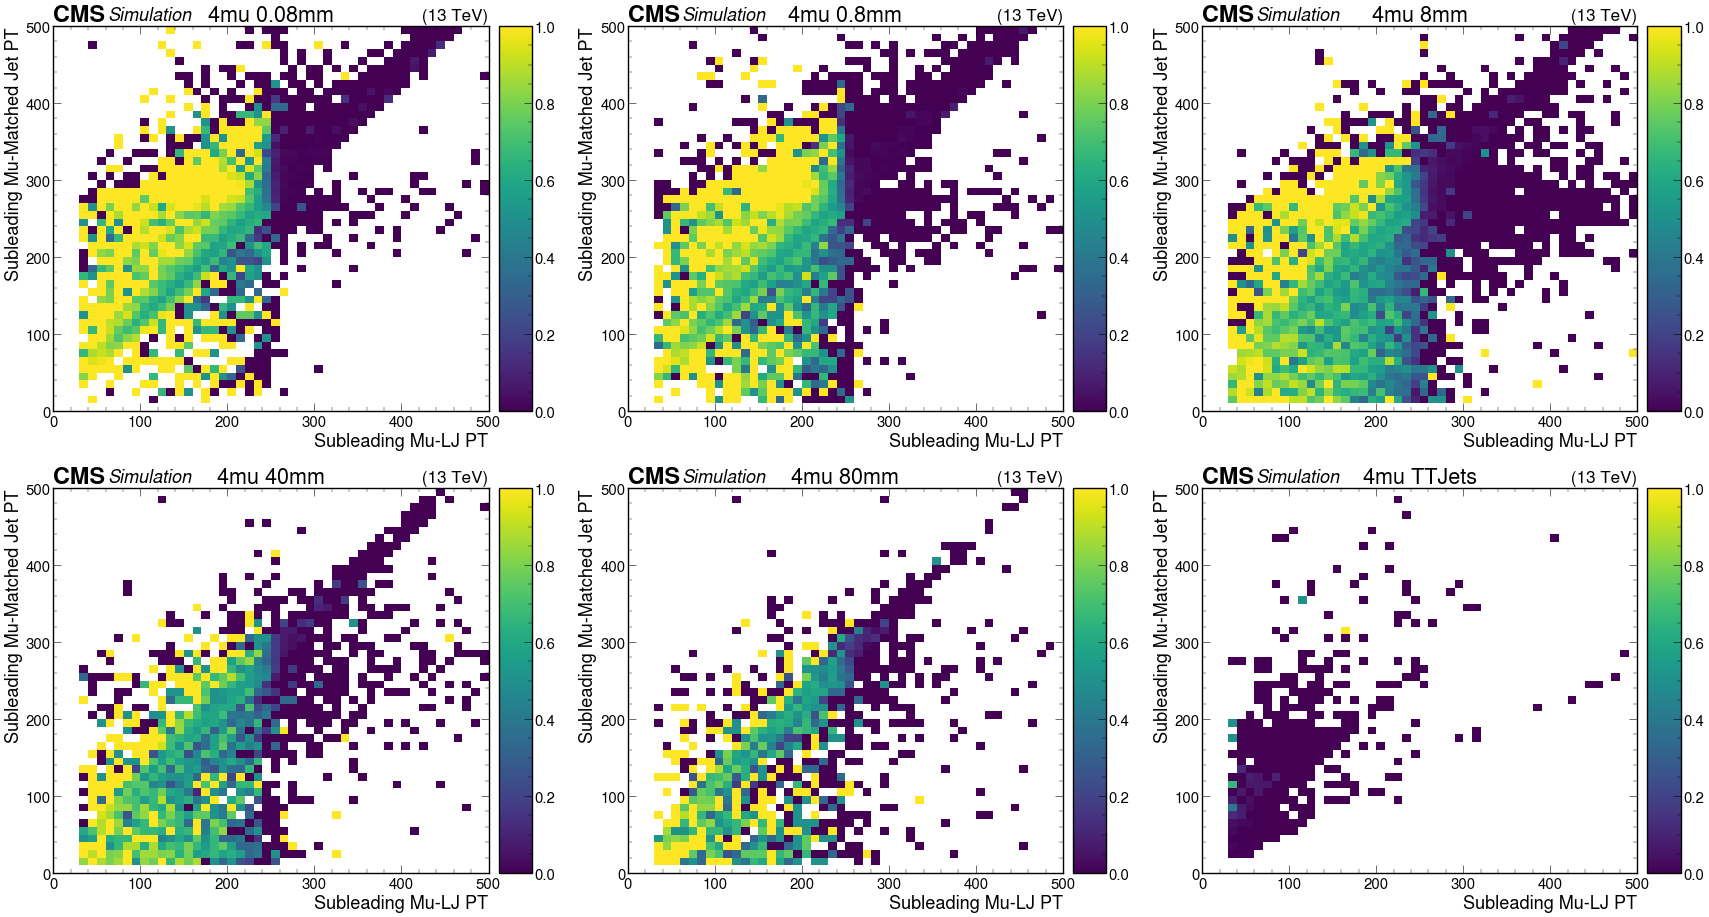

In [44]:
nplots = 3
plt.subplots(2, nplots, figsize=(nplots*14, 22))

plt.subplot(2, nplots, 1)
utilities.plot(eff_hist_sig1_4mu)
plt.title("4mu 0.08mm")

plt.subplot(2, nplots, 2)
utilities.plot(eff_hist_sig2_4mu)
plt.title("4mu 0.8mm")

plt.subplot(2, nplots, 3)
utilities.plot(eff_hist_sig3_4mu)
plt.title("4mu 8mm")

plt.subplot(2, nplots, 4)
utilities.plot(eff_hist_sig4_4mu)
plt.title("4mu 40mm")

plt.subplot(2, nplots, 5)
utilities.plot(eff_hist_sig5_4mu)
plt.title("4mu 80mm")

plt.subplot(2, nplots, 6)
utilities.plot(eff_hist_bkg_4mu)
plt.title("4mu TTJets")